In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,LSTM, Dropout, BatchNormalization, Input,Bidirectional,Multiply
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import concatenate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# standard data 
## 1초에 200개의 데이터

In [28]:
path = 'sisfall_sample2.csv'
data = pd.read_csv(path)
data = data.drop('Unnamed: 0', axis = 1)
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id
0,17,-179,-99,-18,-504,-352,76,-697,-279,D01,SA01
1,15,-174,-90,-53,-568,-306,48,-675,-254,D01,SA01
2,1,-176,-81,-84,-613,-271,-2,-668,-221,D01,SA01
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,D01,SA01
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,D01,SA01
...,...,...,...,...,...,...,...,...,...,...,...
2009995,74,-128,-162,192,73,377,307,-462,-726,D17,SE15
2009996,70,-130,-166,216,77,367,309,-489,-725,D17,SE15
2009997,71,-140,-166,246,75,363,305,-517,-727,D17,SE15
2009998,75,-146,-165,276,70,362,299,-536,-732,D17,SE15


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010000 entries, 0 to 2009999
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ADX_x_acc   int64 
 1   ADX_y_acc   int64 
 2   ADX_z_acc   int64 
 3   ITG_x_rot   int64 
 4   ITG_y_rot   int64 
 5   ITG_z_rot   int64 
 6   MMA_x_acc   int64 
 7   MMA_y_acc   int64 
 8   MMA_z_acc   int64 
 9   activity    object
 10  subject_id  object
dtypes: int64(9), object(2)
memory usage: 168.7+ MB


In [4]:
Female = ['SA01', 'SA03','SA07','SA08','SA12','SA13','SA14','SA15','SA16','SA20','SA22', 'SA23'
         , 'SE02','SE03','SE04','SE08','SE10','SE11','SE15']
male = ['SA02','SA04','SA05','SA06','SA09','SA10','SA11','SA17','SA18','SA19','SA21',
        'SE01','SE05','SE06','SE07','SE09','SE12','SE13','SE14']

Fall = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10',
         'F11','F12','F13','F14','F15']

Non_Fall = SA_ADL = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10',
       'D11','D12','D13','D14','D15','D16','D17','D18','D19']

subject_id = ['SA01','SA02','SA03','SA04','SA05','SA06','SA07','SA08','SA09','SA10',
              'SA11','SA12','SA13','SA14','SA15','SA16','SA17','SA18','SA19','SA20','SA21','SA22','SA23',
             'SE01','SE02','SE03','SE04','SE05','SE06','SE07','SE08','SE09','SE10',
              'SE11','SE12','SE13','SE14','SE15']

activities = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10',
              'D11','D12','D13','D14','D15','D16','D17','D18','D19'
              'F01','F02','F03','F04','F05','F06','F07','F08','F09','F10',
              'F11','F12','F13','F14','F15',]

In [5]:
print('Invalid values in train = {}'.format(data.isnull().values.sum()))
data.isnull().sum()

Invalid values in train = 0


ADX_x_acc     0
ADX_y_acc     0
ADX_z_acc     0
ITG_x_rot     0
ITG_y_rot     0
ITG_z_rot     0
MMA_x_acc     0
MMA_y_acc     0
MMA_z_acc     0
activity      0
subject_id    0
dtype: int64

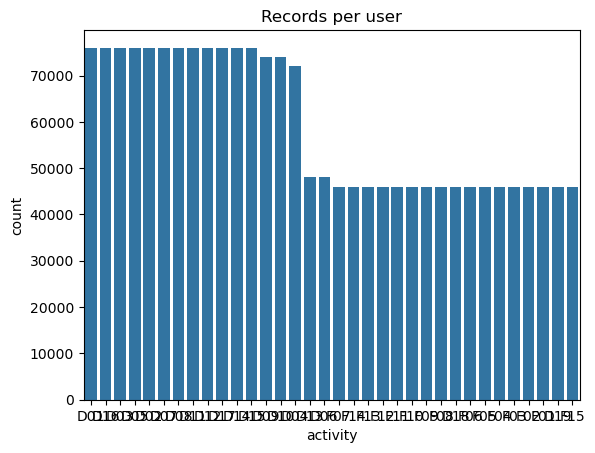

In [6]:
sns.countplot(x = "activity", data = data, palette = [sns.color_palette()[0]],
              order = data.activity.value_counts().index)
plt.title("Records per user");

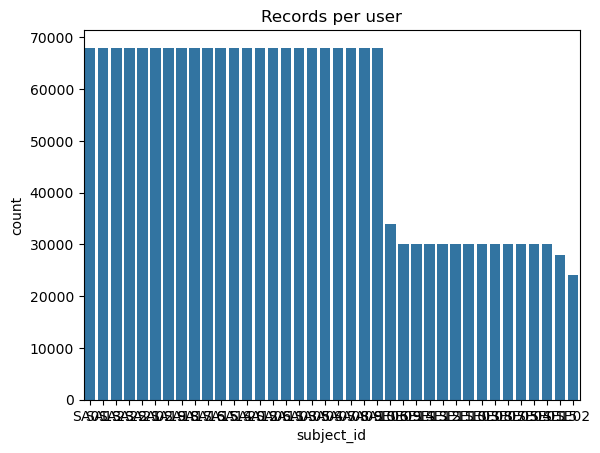

In [7]:
sns.countplot(x = "subject_id", data = data, palette = [sns.color_palette()[0]],
              order = data.subject_id.value_counts().index)
plt.title("Records per user");

In [8]:
data['sex'] = np.where(data['subject_id'].isin(Female), 'F', 'M')

In [9]:
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,17,-179,-99,-18,-504,-352,76,-697,-279,D01,SA01,F
1,15,-174,-90,-53,-568,-306,48,-675,-254,D01,SA01,F
2,1,-176,-81,-84,-613,-271,-2,-668,-221,D01,SA01,F
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,D01,SA01,F
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,D01,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2009995,74,-128,-162,192,73,377,307,-462,-726,D17,SE15,F
2009996,70,-130,-166,216,77,367,309,-489,-725,D17,SE15,F
2009997,71,-140,-166,246,75,363,305,-517,-727,D17,SE15,F
2009998,75,-146,-165,276,70,362,299,-536,-732,D17,SE15,F


In [10]:
data['activity'].isin(Fall).value_counts()

False    1320000
True      690000
Name: activity, dtype: int64

In [11]:
 data.sex.value_counts()

F    1018000
M     992000
Name: sex, dtype: int64

# balanced_data

In [12]:
path = 'sisfall_balanced.csv'
balanced_data = pd.read_csv(path)
balanced_data = balanced_data.drop('Unnamed: 0', axis = 1)
balanced_data['sex'] = np.where(balanced_data['subject_id'].isin(Female), 'F', 'M')
balanced_data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,-9,-257,-25,84,247,27,-120,-987,63,F01,SA01,F
1,-3,-263,-23,99,258,35,-110,-1016,68,F01,SA01,F
2,-1,-270,-22,114,272,45,-94,-1037,69,F01,SA01,F
3,1,-277,-24,127,286,57,-81,-1062,69,F01,SA01,F
4,2,-281,-25,134,303,70,-71,-1079,63,F01,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2070945,74,-128,-162,192,73,377,307,-462,-726,D17,SE15,F
2070946,70,-130,-166,216,77,367,309,-489,-725,D17,SE15,F
2070947,71,-140,-166,246,75,363,305,-517,-727,D17,SE15,F
2070948,75,-146,-165,276,70,362,299,-536,-732,D17,SE15,F


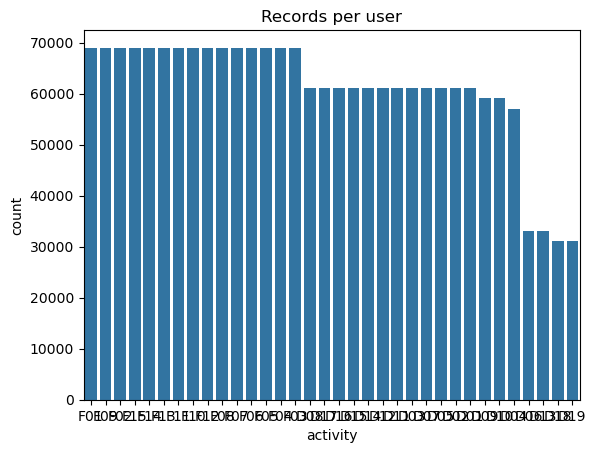

In [13]:
sns.countplot(x = "activity", data = balanced_data, palette = [sns.color_palette()[0]],
              order = balanced_data.activity.value_counts().index)
plt.title("Records per user");

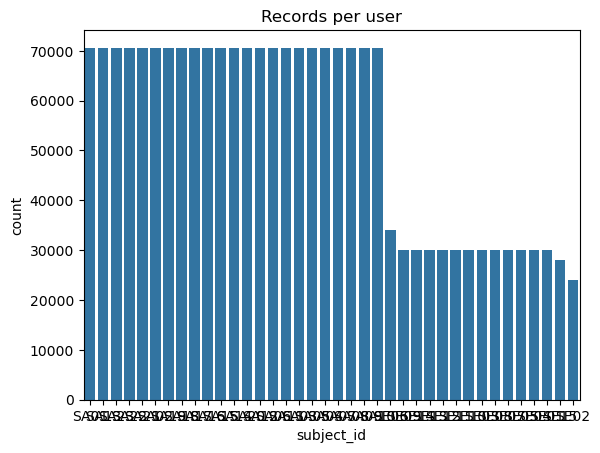

In [14]:
sns.countplot(x = "subject_id", data = balanced_data, palette = [sns.color_palette()[0]],
              order = balanced_data.subject_id.value_counts().index)
plt.title("Records per user");

In [15]:
balanced_data['activity'].isin(Fall).value_counts()

False    1035950
True     1035000
Name: activity, dtype: int64

In [16]:
 balanced_data.sex.value_counts()

F    1049800
M    1021150
Name: sex, dtype: int64

# 1D_Conv

# unbalanced_data

In [29]:
columns = ['ADX_x_acc', 'ADX_y_acc', 'ADX_z_acc' ,
           'ITG_x_rot', 'ITG_y_rot','ITG_z_rot',
           'MMA_x_acc','MMA_y_acc','MMA_z_acc']

In [30]:
for column in columns:
        #data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
        data[column] = data[column] / data[column].max()
data.head()

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id
0,0.004152,-0.043744,-0.024199,-0.000549,-0.032084,-0.029620,0.009278,-0.085093,-0.034062,D01,SA01
1,0.003664,-0.042522,-0.022000,-0.001617,-0.036158,-0.025749,0.005860,-0.082408,-0.031010,D01,SA01
2,0.000244,-0.043011,-0.019800,-0.002564,-0.039022,-0.022804,-0.000244,-0.081553,-0.026981,D01,SA01
3,-0.002443,-0.043988,-0.018822,-0.003174,-0.041187,-0.019101,-0.004151,-0.085093,-0.021365,D01,SA01
4,-0.005129,-0.046676,-0.015400,-0.003906,-0.042969,-0.016072,-0.009034,-0.090465,-0.016237,D01,SA01


In [31]:
le = LabelEncoder()
data['activity'] = le.fit_transform(data['activity'])
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id
0,0.004152,-0.043744,-0.024199,-0.000549,-0.032084,-0.029620,0.009278,-0.085093,-0.034062,0,SA01
1,0.003664,-0.042522,-0.022000,-0.001617,-0.036158,-0.025749,0.005860,-0.082408,-0.031010,0,SA01
2,0.000244,-0.043011,-0.019800,-0.002564,-0.039022,-0.022804,-0.000244,-0.081553,-0.026981,0,SA01
3,-0.002443,-0.043988,-0.018822,-0.003174,-0.041187,-0.019101,-0.004151,-0.085093,-0.021365,0,SA01
4,-0.005129,-0.046676,-0.015400,-0.003906,-0.042969,-0.016072,-0.009034,-0.090465,-0.016237,0,SA01
...,...,...,...,...,...,...,...,...,...,...,...
2009995,0.018075,-0.031281,-0.039599,0.005860,0.004647,0.031723,0.037480,-0.056403,-0.088634,16,SE15
2009996,0.017098,-0.031769,-0.040577,0.006592,0.004902,0.030882,0.037724,-0.059700,-0.088512,16,SE15
2009997,0.017342,-0.034213,-0.040577,0.007508,0.004774,0.030545,0.037236,-0.063118,-0.088756,16,SE15
2009998,0.018319,-0.035679,-0.040332,0.008423,0.004456,0.030461,0.036503,-0.065438,-0.089366,16,SE15


In [32]:
TIME_PERIODS = 200
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 100
LABEL = 'activity'

In [33]:
df = data[(data['activity'] == 33) & (data['subject_id'] == 'SA01')]
df

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id
66000,0.004641,-0.063783,-0.007822,-0.001221,0.001146,-0.000757,-0.000488,-0.122207,0.002930,33,SA01
66001,0.003908,-0.064516,-0.008800,-0.001221,0.001082,-0.000757,-0.000733,-0.122207,0.003663,33,SA01
66002,0.004885,-0.064516,-0.008800,-0.001160,0.001082,-0.000757,-0.000610,-0.121963,0.002808,33,SA01
66003,0.004397,-0.064516,-0.007822,-0.001190,0.001082,-0.000841,-0.000488,-0.122085,0.003052,33,SA01
66004,0.004885,-0.064027,-0.009044,-0.001190,0.001146,-0.000757,-0.000610,-0.122207,0.003296,33,SA01
...,...,...,...,...,...,...,...,...,...,...,...
67995,0.062286,0.008798,-0.035933,-0.001068,0.001209,0.000084,0.109633,0.020754,-0.051642,33,SA01
67996,0.062531,0.009286,-0.035688,-0.001068,0.001337,0.000000,0.109755,0.020022,-0.052008,33,SA01
67997,0.062286,0.009042,-0.036177,-0.001007,0.001337,-0.000168,0.109388,0.020388,-0.052619,33,SA01
67998,0.063019,0.008798,-0.036177,-0.001007,0.001464,-0.000252,0.109633,0.019900,-0.051764,33,SA01


In [34]:
# make train_test dataset
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in subject_id:
    for act in range(0, 34):
        df = data[(data['activity'] == act) & (data['subject_id'] == subject)]
        count = int(len(df) * 0.8)
        train_df = df[:count]
        test_df = df[count:]
        train_data = pd.concat([train_data, train_df], ignore_index = True)
        test_data = pd.concat([test_data, test_df], ignore_index = True)

print('train_data : ' + str(len(train_data)))
print('test_data : ' + str(len(test_data)))

train_data : 1608000
test_data : 402000


In [35]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels

#X_data, y_data = create_segments_and_labels(data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
X_train, y_train = create_segments_and_labels(train_data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
X_test, y_test = create_segments_and_labels(test_data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

C:\Users\procns\AppData\Local\Temp\ipykernel_10420\3560452914.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (16078, 200, 9)
labels shape : (16078,)
reshaped_segments shape :  (4018, 200, 9)
labels shape : (4018,)


In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0, stratify = y_train)

In [37]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")
X_val = X_test.astype("float32")
y_val = y_test.astype("float32")


In [38]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (12862, 200, 9)
y train : (12862,)
X test : (4018, 200, 9)
y test : (4018,)
X val : (4018, 200, 9)
y val : (4018,)


In [39]:
y_train =  y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)
y_val = enc.transform(y_val)

print(X_train.shape, y_train.shape)

(12862, 200, 9) (12862, 34)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# balanced_data

In [74]:
for column in columns:
        #data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
        balanced_data[column] = balanced_data[column] / balanced_data[column].max()
balanced_data.head()

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,-0.002198,-0.062805,-0.006111,0.002564,0.015723,0.002272,-0.014650,-0.120498,0.007691,F01,SA01,F
1,-0.000733,-0.064272,-0.005622,0.003021,0.016424,0.002945,-0.013429,-0.124039,0.008302,F01,SA01,F
2,-0.000244,-0.065982,-0.005378,0.003479,0.017315,0.003787,-0.011476,-0.126602,0.008424,F01,SA01,F
3,0.000244,-0.067693,-0.005867,0.003876,0.018206,0.004796,-0.009889,-0.129654,0.008424,F01,SA01,F
4,0.000489,-0.068671,-0.006111,0.004089,0.019288,0.005890,-0.008668,-0.131730,0.007691,F01,SA01,F


In [75]:
le = LabelEncoder()
balanced_data['activity'] = le.fit_transform(balanced_data['activity'])
balanced_data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,-0.002198,-0.062805,-0.006111,0.002564,0.015723,0.002272,-0.014650,-0.120498,0.007691,19,SA01,F
1,-0.000733,-0.064272,-0.005622,0.003021,0.016424,0.002945,-0.013429,-0.124039,0.008302,19,SA01,F
2,-0.000244,-0.065982,-0.005378,0.003479,0.017315,0.003787,-0.011476,-0.126602,0.008424,19,SA01,F
3,0.000244,-0.067693,-0.005867,0.003876,0.018206,0.004796,-0.009889,-0.129654,0.008424,19,SA01,F
4,0.000489,-0.068671,-0.006111,0.004089,0.019288,0.005890,-0.008668,-0.131730,0.007691,19,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2070945,0.018075,-0.031281,-0.039599,0.005860,0.004647,0.031723,0.037480,-0.056403,-0.088634,16,SE15,F
2070946,0.017098,-0.031769,-0.040577,0.006592,0.004902,0.030882,0.037724,-0.059700,-0.088512,16,SE15,F
2070947,0.017342,-0.034213,-0.040577,0.007508,0.004774,0.030545,0.037236,-0.063118,-0.088756,16,SE15,F
2070948,0.018319,-0.035679,-0.040332,0.008423,0.004456,0.030461,0.036503,-0.065438,-0.089366,16,SE15,F


In [76]:
TIME_PERIODS = 200
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 100
LABEL = 'activity'

In [77]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels

balanced_X_data, balanced_y_data = create_segments_and_labels(balanced_data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
#X_test, y_test = create_segments_and_labels(test_data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

C:\Users\procns\AppData\Local\Temp\ipykernel_10420\1529858928.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (20708, 200, 9)
labels shape : (20708,)


In [79]:
balanced_X_train, balanced_X_test,balanced_y_train, balanced_y_test = train_test_split(balanced_X_data, balanced_y_data, test_size = 0.2, random_state = 0, stratify = balanced_y_data)

In [80]:
balanced_X_train, balanced_X_val, balanced_y_train, balanced_y_val = train_test_split(balanced_X_train, balanced_y_train, test_size = 0.2, random_state = 0, stratify = balanced_y_train)

In [81]:
balanced_X_train = balanced_X_train.astype("float32")
balanced_y_train = balanced_y_train.astype("float32")
balanced_X_test = balanced_X_test.astype("float32")
balanced_y_test = balanced_y_test.astype("float32")
balanced_X_val = balanced_X_test.astype("float32")
balanced_y_val = balanced_y_test.astype("float32")

In [82]:
print("balanced_X train :", balanced_X_train.shape)
print("balanced_y train :", balanced_y_train.shape)
print("balanced_X test :", balanced_X_test.shape)
print("balanced_y test :", balanced_y_test.shape)
print("balanced_X val :", balanced_X_val.shape)
print("balanced_y val :", balanced_y_val.shape)

balanced_X train : (13252, 200, 9)
balanced_y train : (13252,)
balanced_X test : (4142, 200, 9)
balanced_y test : (4142,)
balanced_X val : (4142, 200, 9)
balanced_y val : (4142,)


In [83]:
balanced_y_train =  balanced_y_train.reshape(-1,1)
balanced_y_test = balanced_y_test.reshape(-1,1)
balanced_y_val = balanced_y_val.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(balanced_y_train)

balanced_y_train = enc.transform(balanced_y_train)
balanced_y_test = enc.transform(balanced_y_test)
balanced_y_val = enc.transform(balanced_y_val)

print(balanced_X_train.shape, balanced_y_train.shape)

(13252, 200, 9) (13252, 34)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [85]:
'------------------training 1D cnn-------------------------'

'------------------training 1D cnn-------------------------'

In [40]:
#Epoch 500

verbose,epochs,batch_size=1,30,32
n_hidden = 32
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]
input_dim = len(X_train[0][0])

In [41]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [77]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(n_timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_outputs, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                5376      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 34)                1122      
                                                                 
Total params: 6,498
Trainable params: 6,498
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,
                    validation_data= (X_val,y_val), verbose=verbose)
model.summary()

Epoch 1/30
402/402 [==============================] - 11s 25ms/step - loss: 2.6957 - accuracy: 0.2179 - val_loss: 2.5645 - val_accuracy: 0.2344
Epoch 2/30
402/402 [==============================] - 10s 26ms/step - loss: 2.2505 - accuracy: 0.3051 - val_loss: 2.4840 - val_accuracy: 0.2618
Epoch 3/30
402/402 [==============================] - 11s 27ms/step - loss: 2.1042 - accuracy: 0.3454 - val_loss: 2.4489 - val_accuracy: 0.2690
Epoch 4/30
402/402 [==============================] - 11s 27ms/step - loss: 2.0159 - accuracy: 0.3616 - val_loss: 2.3881 - val_accuracy: 0.3016
Epoch 5/30
402/402 [==============================] - 11s 29ms/step - loss: 1.9464 - accuracy: 0.3824 - val_loss: 2.4367 - val_accuracy: 0.2753
Epoch 6/30
402/402 [==============================] - 12s 29ms/step - loss: 1.8736 - accuracy: 0.4034 - val_loss: 2.3845 - val_accuracy: 0.2977
Epoch 7/30
402/402 [==============================] - 11s 27ms/step - loss: 1.8137 - accuracy: 0.4180 - val_loss: 2.4045 - val_accuracy:

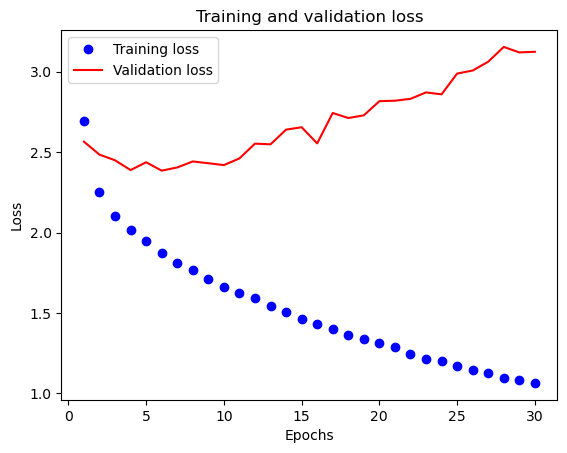

In [44]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

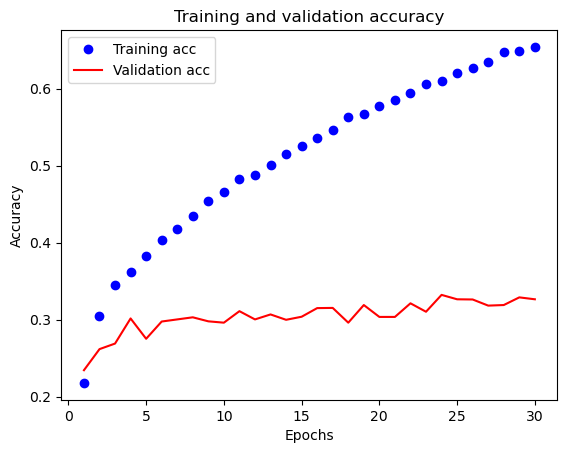

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
'-----------------data accuracy----------------'

'-----------------data accuracy----------------'

In [46]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

126/126 [==============================] - 1s 6ms/step - loss: 3.1232 - accuracy: 0.3265
Accuracy >32.653061
Base Loss >3.12


126/126 [==============================] - 1s 5ms/step


<Axes: >

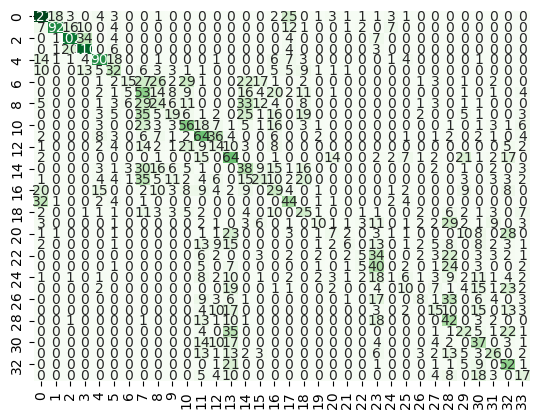

In [72]:
pred_cnn = model.predict(X_test)
len(pred_cnn)
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

In [87]:
'---------------------balanced_test accuracy----------------------'

'---------------------balanced_test accuracy----------------------'

In [89]:
balanced_base_loss,balanced_base_accuracy=model.evaluate(balanced_X_test,balanced_y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
balanced_score=balanced_base_accuracy*100
print('Accuracy >{:f}'.format(balanced_score))
print('Base Loss >{:.2f}'.format(balanced_base_loss))

130/130 [==============================] - 1s 5ms/step - loss: 2.2651 - accuracy: 0.4314
Accuracy >43.143409
Base Loss >2.27


130/130 [==============================] - 1s 5ms/step


<Axes: >

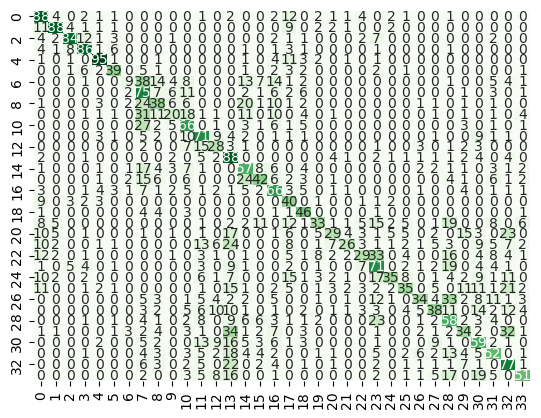

In [92]:
balanced_pred_cnn = model.predict(balanced_X_test)
balanced_y_true = np.argmax(balanced_y_test, axis = 1)
balanced_y_pred = np.argmax(balanced_pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
balanced_cm_cnn = confusion_matrix(balanced_y_true, balanced_y_pred)
sns.heatmap(balanced_cm_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# training balaned_data

In [93]:
TIME_PERIODS = 200
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 100
LABEL = 'activity'

In [94]:
#Epoch 500

verbose,epochs,batch_size=1,30,32 
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [99]:
balanced_model = Sequential()
balanced_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
balanced_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
balanced_model.add(Dropout(0.5))
balanced_model.add(MaxPooling1D(pool_size=2))
balanced_model.add(Flatten())
balanced_model.add(Dense(100, activation='relu'))
balanced_model.add(Dense(n_outputs, activation='softmax'))

In [101]:
balanced_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [102]:
balanced_history = balanced_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,
                    validation_data= (X_val,y_val), verbose=verbose)
balanced_model.summary()

Epoch 1/30
402/402 [==============================] - 11s 25ms/step - loss: 2.6867 - accuracy: 0.2167 - val_loss: 2.6683 - val_accuracy: 0.2081
Epoch 2/30
402/402 [==============================] - 10s 25ms/step - loss: 2.2394 - accuracy: 0.3080 - val_loss: 2.5414 - val_accuracy: 0.2544
Epoch 3/30
402/402 [==============================] - 10s 25ms/step - loss: 2.0930 - accuracy: 0.3401 - val_loss: 2.5423 - val_accuracy: 0.2571
Epoch 4/30
402/402 [==============================] - 10s 26ms/step - loss: 1.9950 - accuracy: 0.3730 - val_loss: 2.4324 - val_accuracy: 0.2782
Epoch 5/30
402/402 [==============================] - 11s 26ms/step - loss: 1.9190 - accuracy: 0.3901 - val_loss: 2.4914 - val_accuracy: 0.2618
Epoch 6/30
402/402 [==============================] - 11s 26ms/step - loss: 1.8474 - accuracy: 0.4116 - val_loss: 2.4378 - val_accuracy: 0.2929
Epoch 7/30
402/402 [==============================] - 11s 27ms/step - loss: 1.7714 - accuracy: 0.4298 - val_loss: 2.4574 - val_accuracy:

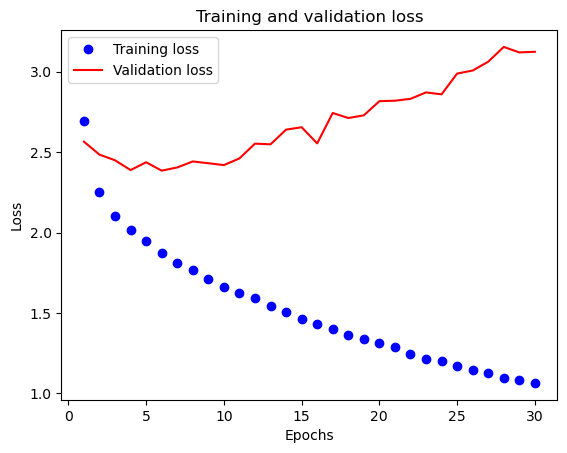

In [103]:
balanced_history_dict = balanced_history.history
loss = balanced_history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

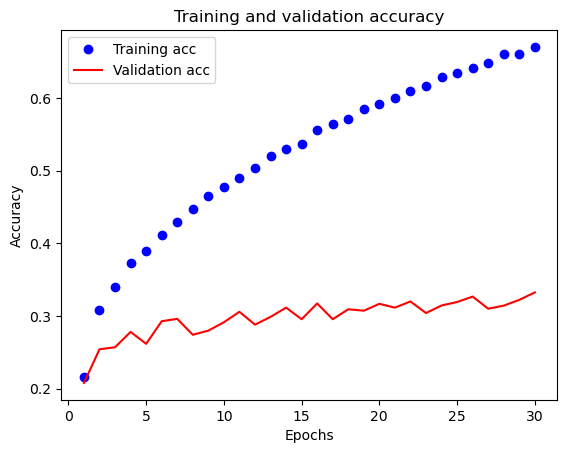

In [104]:
acc = balanced_history.history['accuracy']
val_acc = balanced_history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [108]:
base_loss,base_accuracy=balanced_model.evaluate(balanced_X_test,balanced_y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

130/130 [==============================] - 1s 5ms/step - loss: 2.2613 - accuracy: 0.4534
Accuracy >45.340416
Base Loss >2.26


130/130 [==============================] - 1s 5ms/step


<Axes: >

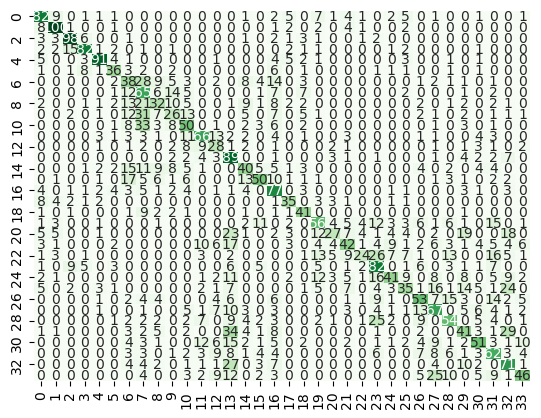

In [110]:
balanced_pred_cnn = balanced_model.predict(balanced_X_test)
len(balanced_pred_cnn)
y_true = np.argmax(balanced_y_test, axis = 1)
y_pred = np.argmax(balanced_pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")   

In [107]:
'---------------------unbalanced_test accuracy----------------------'

'---------------------unbalanced_test accuracy----------------------'

In [109]:
base_loss,base_accuracy=balanced_model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

126/126 [==============================] - 1s 5ms/step - loss: 3.1604 - accuracy: 0.3325
Accuracy >33.250374
Base Loss >3.16


126/126 [==============================] - 1s 5ms/step


<Axes: >

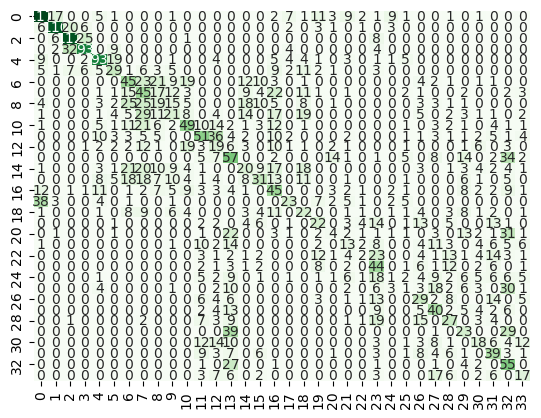

In [111]:
pred_cnn = balanced_model.predict(X_test)
len(pred_cnn)
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")   